### 단축키 사용법
- 실행단축키
  - ctrl + Enter: 실행 후 커서가 그대로 위치
  - shift + Enter: 실행 후 커서 아래 셀로 이동
  - alt + Enter: 실행 후 아래 셀 생성 아래 셀로 이동

- 마크다운 변환 (코드 -> 텍스트)
  - ctrl + m + m

- 코드모드로 변환(텍스트 -> 코드)
  - ctrl + m + y

- 셀 아래에 추가하기
  - ctrl + m + b

- 셀 위에 셀 추가하기
  - ctrl + m + a

### 딥러닝 맛보기
- 딥러닝이란?
  - 인간의 신경망을 모방하여 학습하고 예측하는 기술
  - 대량의 데이터에서 복잡한 패턴이나 규칙을 찾아내는 능력이 뛰어남
  - 머신러닝에 비해 조금 더 유연한 사고를 한다
  - 인간의 뉴런 == 딥러닝에서 선형모델
  - 주로 영상,음성,이미지 처리에 사용된다~

- tensorflow
  - 구글이 만든 딥러닝을 위한 라이브러리

- keras
  - tensorflow 위에서 동작하는 라이브러리로 사용자 친화적 라이브러리

In [ ]:
# tensorflow 버전 확인
import tensorflow as tf
print(tf.__version__)
# 2.13.0
# 설치버전 확인이유: 프로젝트 진행시 오픈소스 가져다쓸때 충돌방지

2.13.0


In [ ]:
# 리눅스기반의 코랩 (리눅스 명령어 그대로 사용가능)
# 리눅스 명령어를 사용하여 현재 작업 디렉토리 확인
!pwd # print work directory

/content


In [ ]:
# 현재 작업 디렉토리의 파일 목록 조회
!ls

drive  sample_data


In [ ]:
# 작업 디렉토리 변경
# %cd  (change directory)
%cd "/content/drive/MyDrive/Colab Notebooks/23.09.15 DeepLearning (Spring)"

/content/drive/MyDrive/Colab Notebooks/23.09.15 DeepLearning (Spring)


In [ ]:
# 다시 현재 폴더 경로 확인
!pwd

/content/drive/MyDrive/Colab Notebooks/23.09.15 DeepLearning (Spring)


### 목표
- 공부시간에 따른 수학성적을 예측하는 회귀모델을 만들어보자~
- keras 활용해서 신경망 구성하는 방법을 연습해보자

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# 데이터 불러오기
data = pd.read_csv('./data/student-mat.csv', delimiter= ';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [ ]:
# 데이터 정보확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### 문제와 답으로 분리
- 입력특성: 1개 (studytime)
- 정답: G3

In [ ]:
# 문제데이터 (X)
X = data['studytime']
# 정답데이터 (y)
y = data['G3']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train,test 분리
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 random_state=915,
                                                 test_size = 0.2)

In [ ]:
# 크기확인
X_train.shape, y_train.shape

((316,), (316,))

In [ ]:
X_test.shape, y_test.shape

((79,), (79,))

### 머신러닝모델과 딥러닝모델의 차이점
- 머신러닝
  - 완제품 장난감: 팔정도만 움직일수 있음(하이퍼파라미터만 조절)
  - 모델생성(완성된 객체 사용) -> 모델학습 -> 모델예측 -> 모델평가

- 딥러닝
  - 레고블럭: 다양한 구성이 가능
  - 모델생성(모델을 직접 구성) -> 모델학습 -> 모델 예측 -> 모델 평가

### 머신러닝 모델링 (선형회귀모델)

In [ ]:
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.metrics import mean_squared_error # 회귀모델의 평가지표 도구

In [ ]:
from sklearn import linear_model
# 1. 모델 생성
linear_model = LinearRegression()

# 2. 모델 학습 (학습용문제, 학습용 정답)
linear_model.fit(X_train.values.reshape(-1,1), y_train)

# 3. 모델 예측 (테스트용 문제)
linear_pre = linear_model.predict(X_test.values.reshape(-1,1))

# 4. 모델 평가 (실제값, 예측값)
mean_squared_error(y_test, linear_pre)

24.058078771701606

In [ ]:
# 머신러닝 모델은 입력특성을 2차원으로 받는다!
# 1차원 -> 2차원 변경
X_train.values.reshape(-1,1)

### 딥러닝 모델링 (모델 구조 설계)

In [ ]:
# 딥러닝 모델 도구 불러오기
# 텐서플로우 안에있는 keras
from tensorflow.keras.models import Sequential # 모델의 뼈대
# 신경망의 구성요소 (하나씩 조립)
from tensorflow.keras.layers import InputLayer, Dense, Activation
# InputLayer: 입력
# Dense : 밀집도
# Activation : 활성화함수 (인간을 모방하기 위해서 사용하는 함수)

##### 딥러닝모델 설계 순서
1. 신경망 구조 설계
2. 신경망 학습 및 평가 방법 설정
3. 학습
4. 예측 및 평가

In [ ]:
# 1. 신경망 구조 설계
# 뼈대 생성
model = Sequential()
# 입력층
model.add(InputLayer(input_shape = (1,))) # 입력특성의 개수를 작성 (studytime 1개)
# 중간층 (은닉층)
model.add(Dense(units = 10)) # 뉴런 10개를 연결 -> 학습의 능력을 결정
model.add(Activation('sigmoid')) # 활성화함수  : 인간을 모방을 위함 (위 선형함수와 짝꿍)
# 출력층
model.add(Dense(units = 1)) # 예측할 데이터의 형태 (성적데이터 1개)

In [ ]:
from sklearn import metrics
# 2. 학습 및 평가 방법 설정
# 딥러닝 모델은 학습법과 평가법을 지정해주어야한다!
model.compile(loss = 'mean_squared_error', # 모델의 잘못된 정도 (오차) 측정알고리즘
              optimizer = 'SGD', # 모델의 w,b 값을 최적화하는 알고리즘
              metrics = ['mse'])

In [ ]:
#3. 모델학습
h1 = model.fit(X_train,y_train, validation_split=0.2, # 교차검증을 위한 데이터 남겨두기
               epochs = 20) # 모델의 최적화 (업데이트 횟수,반복횟수)
# h1 변수에 담는이유: 로그를 출력하여 패턴을 확인하기위함

Epoch 1/20
8/8 [==============================] - 2s 92ms/step - loss: 71.1742 - mse: 71.1742 - val_loss: 38.1198 - val_mse: 38.1198
Epoch 2/20
8/8 [==============================] - 0s 9ms/step - loss: 27.2956 - mse: 27.2956 - val_loss: 24.2478 - val_mse: 24.2478
Epoch 3/20
8/8 [==============================] - 0s 10ms/step - loss: 20.3231 - mse: 20.3231 - val_loss: 22.7483 - val_mse: 22.7483
Epoch 4/20
8/8 [==============================] - 0s 8ms/step - loss: 19.5392 - mse: 19.5392 - val_loss: 22.6569 - val_mse: 22.6569
Epoch 5/20
8/8 [==============================] - 0s 8ms/step - loss: 19.5606 - mse: 19.5606 - val_loss: 22.6620 - val_mse: 22.6620
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 19.4832 - mse: 19.4832 - val_loss: 22.6658 - val_mse: 22.6658
Epoch 7/20
8/8 [==============================] - 0s 6ms/step - loss: 19.5133 - mse: 19.5133 - val_loss: 22.6762 - val_mse: 22.6762
Epoch 8/20
8/8 [==============================] - 0s 8ms/step - loss: 19.4

In [ ]:
#4. 모델 평가
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 7ms/step - loss: 24.2923 - mse: 24.2923


[24.292314529418945, 24.292314529418945]

In [ ]:
# 모델학습 로그출력
h1.history

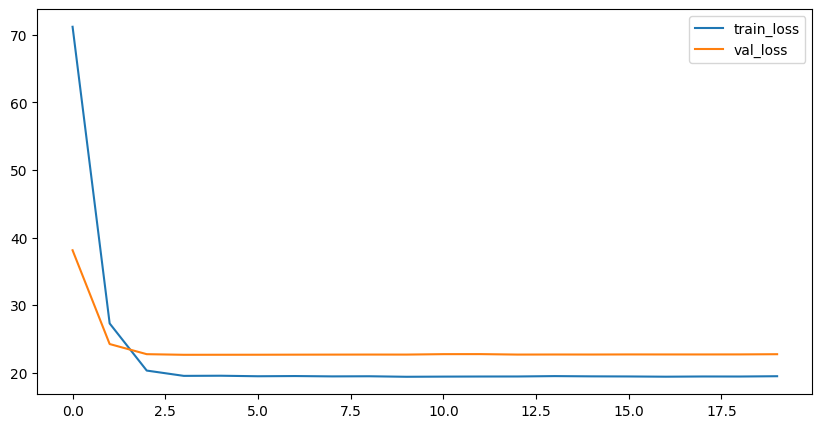

In [ ]:
# 모델학습 시각화
plt.figure(figsize = (10,5))
plt.plot(h1.history['loss'], label = 'train_loss')
plt.plot(h1.history['val_loss'], label = 'val_loss')
plt.legend()# 범례
plt.show()

In [ ]:
data.info()

### 4개의 입력특성을 골라 학습시켜보자!

In [ ]:
X = data[['studytime','freetime','traveltime','health']]
y = data['G3']

In [ ]:
# train,test 분리
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 918)

In [ ]:
# 데이터크기
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((316, 4), (316,), (79, 4), (79,))

In [ ]:
# 1. 신경망 구조설계
# 뼈대
model2 = Sequential()
# 입력층 input_shape = 나의 특성수
model2.add(InputLayer(input_shape = (4,))) # 입력특성 4개
# 중간층
model2.add(Dense(units = 10))
model2.add(Activation ('sigmoid'))
# 출력층
model2.add(Dense (units = 1))

In [ ]:
# 2. 학습방법과 평가방법 설정
model2.compile( loss = 'mean_squared_error',
               optimizer = 'SGD',
                metrics = ['mse'])

In [ ]:
# 3. 학습
h2 = model2.fit(X_train,y_train,validation_split=0.2, epochs = 20)

Epoch 1/20
8/8 [==============================] - 1s 32ms/step - loss: 67.6446 - mse: 67.6446 - val_loss: 39.9690 - val_mse: 39.9690
Epoch 2/20
8/8 [==============================] - 0s 8ms/step - loss: 25.4349 - mse: 25.4349 - val_loss: 27.6743 - val_mse: 27.6743
Epoch 3/20
8/8 [==============================] - 0s 7ms/step - loss: 21.2952 - mse: 21.2952 - val_loss: 25.6486 - val_mse: 25.6486
Epoch 4/20
8/8 [==============================] - 0s 10ms/step - loss: 20.8482 - mse: 20.8482 - val_loss: 25.5858 - val_mse: 25.5858
Epoch 5/20
8/8 [==============================] - 0s 7ms/step - loss: 21.0390 - mse: 21.0390 - val_loss: 25.3216 - val_mse: 25.3216
Epoch 6/20
8/8 [==============================] - 0s 9ms/step - loss: 20.8740 - mse: 20.8740 - val_loss: 25.2296 - val_mse: 25.2296
Epoch 7/20
8/8 [==============================] - 0s 9ms/step - loss: 20.7414 - mse: 20.7414 - val_loss: 25.2580 - val_mse: 25.2580
Epoch 8/20
8/8 [==============================] - 0s 6ms/step - loss: 20.7

In [ ]:
# 4. 예측 및 평가
model2.evaluate(X_test,y_test)

3/3 [==============================] - 0s 8ms/step - loss: 19.7092 - mse: 19.7092


[19.70917510986328, 19.70917510986328]

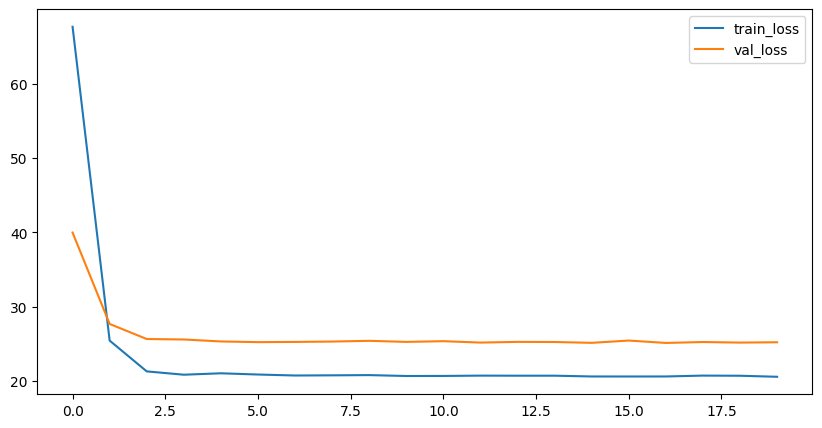

In [ ]:
# 5. 시각화
plt.figure(figsize = (10,5))
plt.plot(h2.history['loss'], label = 'train_loss')
plt.plot(h2.history['val_loss'], label = 'val_loss')
plt.legend()# 범례
plt.show()